In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [8]:
file_path = "exoplanet_data.csv"
df = pd.read_csv("exoplanet_data.csv")

print("Dataset Loaded Successfully")
df.head()



Dataset Loaded Successfully


,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,...,st_teff,st_rad,st_mass,st_met,st_lum,st_logg,sy_dist,disc_year,discoverymethod,disc_facility
0,HR 8799 d,HR 8799,1,4,37000.00000,24.00000,13.000000,1.200,3000.00000,10.000,...,NaN,NaN,1.500,-0.47,0.69197,NaN,41.2441,2008,Imaging,W. M. Keck Observatory
1,WASP-96 b,WASP-96,1,1,3.42526,0.04530,13.450000,1.200,152.55000,0.480,...,5540.0,1.050,1.060,0.14,NaN,4.420,352.4640,2014,Transit,SuperWASP
2,HD 114783 b,HD 114783,1,2,493.70000,1.16000,NaN,NaN,349.60000,1.100,...,5135.0,NaN,0.853,0.21,NaN,NaN,21.0628,2001,Radial Velocity,W. M. Keck Observatory
3,HAT-P-1 b,HAT-P-1,2,1,4.46530,0.05561,14.784671,1.319,166.86075,0.525,...,5980.0,1.174,1.151,0.13,NaN,4.359,158.9790,2006,Transit,HATNet
4,HR 8799 b,HR 8799,1,4,170000.00000,68.00000,13.000000,1.200,2000.00000,7.000,...,NaN,NaN,1.500,-0.47,0.69197,NaN,41.2441,2008,Imaging,Gemini Observatory


In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          6052 non-null   object 
 1   hostname         6052 non-null   object 
 2   sy_snum          6052 non-null   int64  
 3   sy_pnum          6052 non-null   int64  
 4   pl_orbper        5732 non-null   float64
 5   pl_orbsmax       3778 non-null   float64
 6   pl_rade          4510 non-null   float64
 7   pl_radj          4510 non-null   float64
 8   pl_bmasse        2976 non-null   float64
 9   pl_bmassj        2976 non-null   float64
 10  pl_orbeccen      2564 non-null   float64
 11  pl_eqt           1635 non-null   float64
 12  pl_insol         893 non-null    float64
 13  pl_dens          1142 non-null   float64
 14  st_spectype      1285 non-null   object 
 15  st_teff          5357 non-null   float64
 16  st_rad           5280 non-null   float64
 17  st_mass       

(6052, 25)

In [5]:
df.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'pl_orbper', 'pl_orbsmax',
       'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_orbeccen', 'pl_eqt',
       'pl_insol', 'pl_dens', 'st_spectype', 'st_teff', 'st_rad', 'st_mass',
       'st_met', 'st_lum', 'st_logg', 'sy_dist', 'disc_year',
       'discoverymethod', 'disc_facility'],
      dtype='object')

In [11]:
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing %": missing_percent
}).sort_values(by="Missing %", ascending=False)

missing_df



,Missing Count,Missing %
pl_insol,5159,85.244547
pl_dens,4910,81.130205
st_spectype,4767,78.767350
st_lum,4621,76.354924
pl_eqt,4417,72.984137
pl_orbeccen,3488,57.633840
pl_bmassj,3076,50.826173
pl_bmasse,3076,50.826173
pl_orbsmax,2274,37.574356
st_met,1767,29.196960


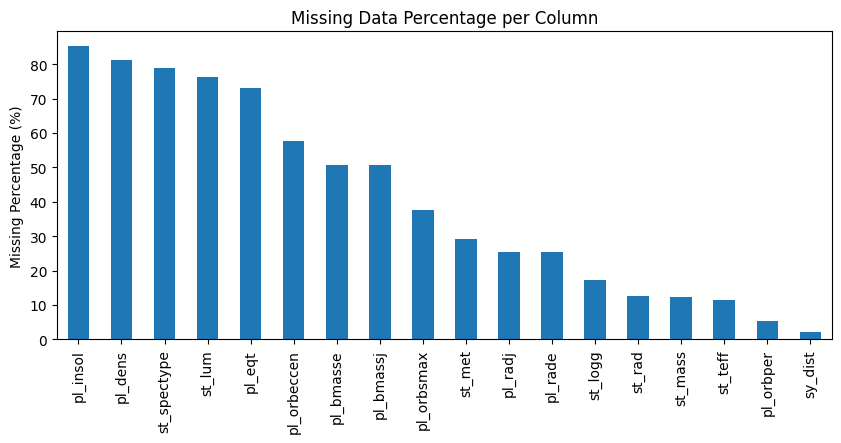

In [12]:
plt.figure(figsize=(10,4))
missing_percent[missing_percent > 0].sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Data Percentage per Column")
plt.show()


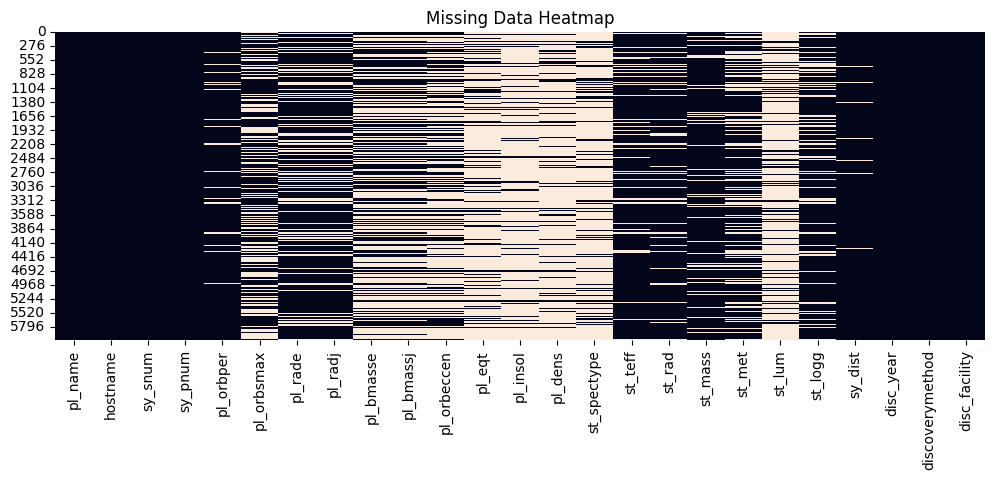

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [14]:
threshold = 0.4
df = df.loc[:, df.isna().mean() < threshold]

print("Remaining columns:", df.columns)


Remaining columns: Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'pl_orbper', 'pl_orbsmax',
       'pl_rade', 'pl_radj', 'st_teff', 'st_rad', 'st_mass', 'st_met',
       'st_logg', 'sy_dist', 'disc_year', 'discoverymethod', 'disc_facility'],
      dtype='object')


In [17]:
df.columns = df.columns.str.strip().str.lower()


In [18]:
important_features = [
    'pl_rade',       # planet radius (Earth radii)
    'pl_orbsmax',    # semi-major axis (AU)
    'pl_orbper',     # orbital period
    'st_mass',       # star mass
    'st_teff'        # star temperature
]

df = df[important_features]
df.head()


,pl_rade,pl_orbsmax,pl_orbper,st_mass,st_teff
0,13.000000,24.00000,37000.00000,1.500,NaN
1,13.450000,0.04530,3.42526,1.060,5540.0
2,NaN,1.16000,493.70000,0.853,5135.0
3,14.784671,0.05561,4.46530,1.151,5980.0
4,13.000000,68.00000,170000.00000,1.500,NaN


In [19]:
df['habitable'] = np.where(
    (df['pl_rade'] >= 0.5) & (df['pl_rade'] <= 2.0) &
    (df['pl_orbsmax'] >= 0.5) & (df['pl_orbsmax'] <= 1.5),
    1, 0
)

df['habitable'].value_counts()


C:\Users\bprat\AppData\Local\Temp\ipykernel_13080\1237810171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['habitable'] = np.where(


habitable
0    6047
1       5
Name: count, dtype: int64

In [21]:
df.isna().sum()



pl_rade       0
pl_orbsmax    0
pl_orbper     0
st_mass       0
st_teff       0
habitable     0
dtype: int64

In [22]:
for col in df.columns:
    if df[col].isna().mean() < 0.4:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df.drop(columns=col, inplace=True)

C:\Users\bprat\AppData\Local\Temp\ipykernel_13080\1483011250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\bprat\AppData\Local\Temp\ipykernel_13080\1483011250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\bprat\AppData\Lo

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |
          (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [25]:
df['habitability_score'] = (
    1 / df['pl_rade'] +
    1 / df['pl_orbsmax']
)

df['habitability_score'].fillna(df['habitability_score'].median(), inplace=True)


C:\Users\bprat\AppData\Local\Temp\ipykernel_13080\471346667.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['habitability_score'].fillna(df['habitability_score'].median(), inplace=True)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = [
    'pl_rade',
    'pl_orbsmax',
    'pl_orbper',
    'st_mass',
    'st_teff',
    'habitability_score'
]

df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('habitable', axis=1)
y = df['habitable']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [41]:
print("Missing values:\n", df.isna().sum())
print("\nClass distribution:\n", df['habitable'].value_counts())
print("\nData shape:", df.shape)


Missing values:
 pl_rade               0
pl_orbsmax            0
pl_orbper             0
st_mass               0
st_teff               0
habitable             0
habitability_score    0
dtype: int64

Class distribution:
 habitable
0    3365
Name: count, dtype: int64

Data shape: (3365, 7)
